In [3]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()

In [4]:
spark_df = spark.read.csv('Database/CardiovascularDisease/CVD_cleaned.csv', header=True)

In [5]:
# 2.2 Describe the data
from pyspark.sql.functions import col

spark_df = spark_df.withColumn("Alcohol_Consumption", col("Alcohol_Consumption").cast("int"))
spark_df = spark_df.withColumn("Height_(cm)", col("Height_(cm)").cast("int"))
spark_df = spark_df.withColumn("Weight_(kg)", col("Weight_(kg)").cast("float"))
spark_df = spark_df.withColumn("BMI", col("BMI").cast("float"))
spark_df = spark_df.withColumn("Height_(cm)", col("Height_(cm)").cast("int"))
spark_df = spark_df.withColumn("Fruit_Consumption", col("Fruit_Consumption").cast("int"))
spark_df = spark_df.withColumn("Green_Vegetables_Consumption", col("Green_Vegetables_Consumption").cast("int"))
spark_df = spark_df.withColumn("FriedPotato_Consumption", col("FriedPotato_Consumption").cast("int"))


spark_df.printSchema()

root
 |-- General_Health: string (nullable = true)
 |-- Checkup: string (nullable = true)
 |-- Exercise: string (nullable = true)
 |-- Heart_Disease: string (nullable = true)
 |-- Skin_Cancer: string (nullable = true)
 |-- Other_Cancer: string (nullable = true)
 |-- Depression: string (nullable = true)
 |-- Diabetes: string (nullable = true)
 |-- Arthritis: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age_Category: string (nullable = true)
 |-- Height_(cm): integer (nullable = true)
 |-- Weight_(kg): float (nullable = true)
 |-- BMI: float (nullable = true)
 |-- Smoking_History: string (nullable = true)
 |-- Alcohol_Consumption: integer (nullable = true)
 |-- Fruit_Consumption: integer (nullable = true)
 |-- Green_Vegetables_Consumption: integer (nullable = true)
 |-- FriedPotato_Consumption: integer (nullable = true)



In [6]:
spark_df.count()

308854

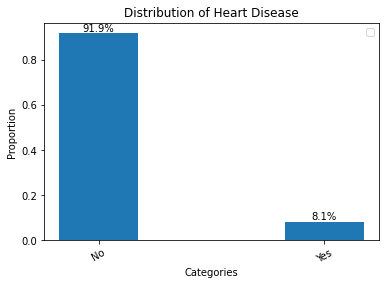

In [7]:
# 2.3 Explore the data
import matplotlib.pyplot as plt 
import pandas as pd

pandas_df = spark_df.toPandas()
# Heart Disease
unique_values_Heart_Disease = pandas_df['Heart_Disease'].unique()
count_values_Heart_Disease = pandas_df['Heart_Disease'].value_counts()
proportion_values_Heart_Disease = pandas_df['Heart_Disease'].value_counts(normalize=True)

# unique_values_Heart_Disease
from utilities import bar_plot
bar_plot(variables=unique_values_Heart_Disease, data=proportion_values_Heart_Disease, title="Distribution of Heart Disease", ylabel="Proportion", xlabel="Categories")

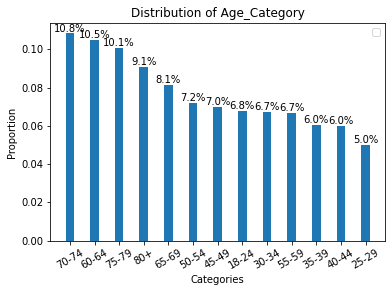

In [8]:
# Age_Category
unique_values_Age_Category = pandas_df['Age_Category'].unique()
count_values_Age_Category = pandas_df['Age_Category'].value_counts()
proportion_values_Age_Category = pandas_df['Age_Category'].value_counts(normalize=True)

bar_plot(variables=unique_values_Age_Category, data=proportion_values_Age_Category, title="Distribution of Age_Category", ylabel="Proportion", xlabel="Categories")

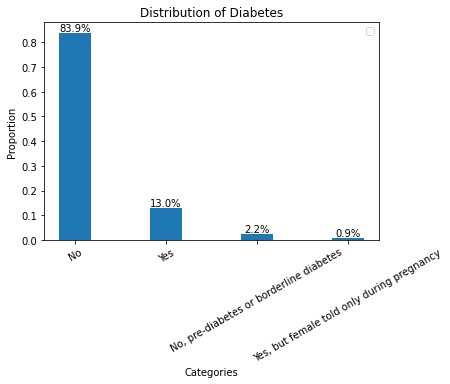

In [9]:
# Diabetes
unique_values_Diabetes = pandas_df['Diabetes'].unique()
count_values_Diabetes = pandas_df['Diabetes'].value_counts()
proportion_values_Diabetes = pandas_df['Diabetes'].value_counts(normalize=True)

bar_plot(variables=unique_values_Diabetes, data=proportion_values_Diabetes, title="Distribution of Diabetes", ylabel="Proportion", xlabel="Categories")

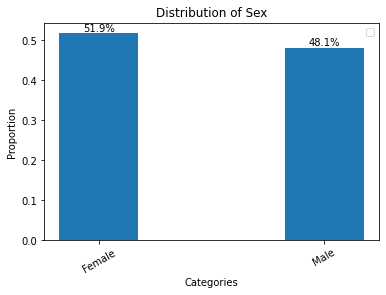

In [10]:
# Sex
unique_values_Sex = pandas_df['Sex'].unique()
count_values_Sex = pandas_df['Sex'].value_counts()
proportion_values_Sex = pandas_df['Sex'].value_counts(normalize=True)

bar_plot(variables=unique_values_Sex, data=proportion_values_Sex, title="Distribution of Sex", ylabel="Proportion", xlabel="Categories")

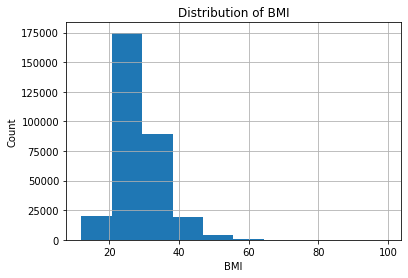

In [11]:
# BMI
BMI = pandas_df['BMI']

BMI.hist()
plt.title('Distribution of BMI')
plt.ylabel('Count')
plt.xlabel('BMI')
plt.show()

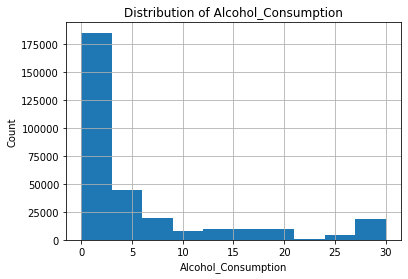

In [12]:
# Alcohol_Consumption
Alcohol_Consumption = pandas_df['Alcohol_Consumption']

Alcohol_Consumption.hist()
plt.title('Distribution of Alcohol_Consumption')
plt.ylabel('Count')
plt.xlabel('Alcohol_Consumption')
plt.show()

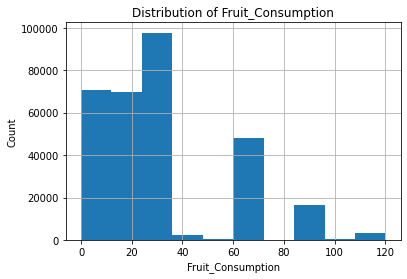

In [13]:
# Fruit_Consumption
Fruit_Consumption = pandas_df['Fruit_Consumption']

Fruit_Consumption.hist()
plt.title('Distribution of Fruit_Consumption')
plt.ylabel('Count')
plt.xlabel('Fruit_Consumption')
plt.show()

In [14]:
# 2.4 verify the data quality

# Check the null value
pandas_df.isna().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [15]:
import os
import random
# generate unclean CVD dataset
if os.path.exists('./Database/CardiovascularDisease/CVD_unclean.csv'):
      print("CVD_uncleaned.csv existed.")
else:
    cvd_cleaned_data_df = pd.read_csv('./Database/CardiovascularDisease/CVD_cleaned.csv')
    error_data = {}
    missing_value = np.nan
    row = cvd_cleaned_data_df.shape[0]
    column = cvd_cleaned_data_df.shape[1]

    # there are 308854 * 19 data and each data 1/10000 * 1/6 chance that it will become a missing value.
    for r in range(row):
        num = random.randint(1, 10000)  # 1/10000 chance to select a target row
        if num == 1:
            for key, value in error_data.items():
                if random.randint(1, 6) == 1:  # 1/6 chance to add a missing value to a target cell
                    cvd_cleaned_data_df.loc[r, key] = missing_value

    cvd_cleaned_data_df.to_csv("./Database/CardiovascularDisease/CVD_unclean.csv", index=False)
    print("finished")

CVD_uncleaned.csv existed.


In [16]:
spark_unclean_df = spark.read.csv('Database/CardiovascularDisease/CVD_unclean.csv', header=True)

In [17]:
# check the total null values

from pyspark.sql.functions import col, sum
null_counts = spark_unclean_df.select([sum(col(c).isNull().cast("int")).alias(c) for c in spark_unclean_df.columns])

null_counts.show()


+--------------+-------+--------+-------------+-----------+------------+----------+--------+---------+---+------------+-----------+-----------+---+---------------+-------------------+-----------------+----------------------------+-----------------------+
|General_Health|Checkup|Exercise|Heart_Disease|Skin_Cancer|Other_Cancer|Depression|Diabetes|Arthritis|Sex|Age_Category|Height_(cm)|Weight_(kg)|BMI|Smoking_History|Alcohol_Consumption|Fruit_Consumption|Green_Vegetables_Consumption|FriedPotato_Consumption|
+--------------+-------+--------+-------------+-----------+------------+----------+--------+---------+---+------------+-----------+-----------+---+---------------+-------------------+-----------------+----------------------------+-----------------------+
|            21|     23|      13|           28|         30|          22|        22|      18|       28| 17|          23|         23|         28| 23|             21|                 26|               22|                          16|     

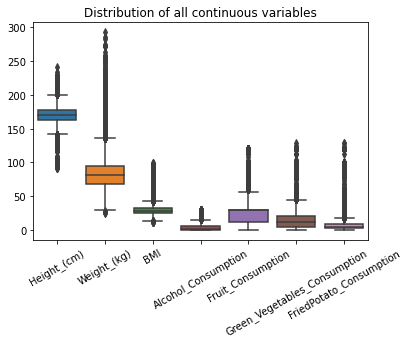

In [18]:
import seaborn as sns 
spark_unclean_df = spark_unclean_df.withColumn("Alcohol_Consumption", col("Alcohol_Consumption").cast("int"))
spark_unclean_df = spark_unclean_df.withColumn("Height_(cm)", col("Height_(cm)").cast("int"))
spark_unclean_df = spark_unclean_df.withColumn("Weight_(kg)", col("Weight_(kg)").cast("float"))
spark_unclean_df = spark_unclean_df.withColumn("BMI", col("BMI").cast("float"))
spark_unclean_df = spark_unclean_df.withColumn("Height_(cm)", col("Height_(cm)").cast("int"))
spark_unclean_df = spark_unclean_df.withColumn("Fruit_Consumption", col("Fruit_Consumption").cast("int"))
spark_unclean_df = spark_unclean_df.withColumn("Green_Vegetables_Consumption", col("Green_Vegetables_Consumption").cast("int"))
spark_unclean_df = spark_unclean_df.withColumn("FriedPotato_Consumption", col("FriedPotato_Consumption").cast("int"))

pandas_unclean_df = spark_unclean_df.toPandas()

sns.boxplot(data=pandas_unclean_df)
plt.title('Distribution of all continuous variables')
plt.xticks(rotation=30)
plt.show()

In [19]:
# 3.0 Data preparation

# 3.1 Select the data
from pyspark.sql.functions import col

target_variable = spark_unclean_df.select('Heart_Disease')
predictor_variables = spark_unclean_df.select(col('Diabetes'),col('Sex'),col('Age_Category'),
                                              col('BMI'),col('Alcohol_Consumption'),col('Fruit_Consumption'))


In [20]:
predictor_variables.show(5)

+--------+------+------------+-----+-------------------+-----------------+
|Diabetes|   Sex|Age_Category|  BMI|Alcohol_Consumption|Fruit_Consumption|
+--------+------+------------+-----+-------------------+-----------------+
|      No|Female|       70-74|14.54|                  0|               30|
|     Yes|Female|       70-74|28.29|                  0|               30|
|     Yes|Female|       60-64|33.47|                  4|               12|
|     Yes|  null|       75-79|28.73|                  0|               30|
|      No|  Male|         80+|24.37|                  0|                8|
+--------+------+------------+-----+-------------------+-----------------+
only showing top 5 rows



In [21]:
target_variable.show(5)

+-------------+
|Heart_Disease|
+-------------+
|           No|
|          Yes|
|           No|
|          Yes|
|           No|
+-------------+
only showing top 5 rows



In [22]:
# 3.2 Clean the data - null/missing values

spark_cleaned_df = spark_unclean_df.na.drop()

In [23]:
from pyspark.sql.functions import col, sum
null_counts = spark_cleaned_df.select([sum(col(c).isNull().cast("int")).alias(c) for c in spark_unclean_df.columns])

null_counts.show()

+--------------+-------+--------+-------------+-----------+------------+----------+--------+---------+---+------------+-----------+-----------+---+---------------+-------------------+-----------------+----------------------------+-----------------------+
|General_Health|Checkup|Exercise|Heart_Disease|Skin_Cancer|Other_Cancer|Depression|Diabetes|Arthritis|Sex|Age_Category|Height_(cm)|Weight_(kg)|BMI|Smoking_History|Alcohol_Consumption|Fruit_Consumption|Green_Vegetables_Consumption|FriedPotato_Consumption|
+--------------+-------+--------+-------------+-----------+------------+----------+--------+---------+---+------------+-----------+-----------+---+---------------+-------------------+-----------------+----------------------------+-----------------------+
|             0|      0|       0|            0|          0|           0|         0|       0|        0|  0|           0|          0|          0|  0|              0|                  0|                0|                           0|     

In [24]:
num_rows = spark_cleaned_df.count()
num_cols = len(spark_cleaned_df.columns)

print("shape ({}, {})".format(num_rows, num_cols) )

shape (308726, 19)


In [25]:
# 3.1 Select the data - extra step

spark_cleaned_df.select(col('Diabetes'),
                        col('Sex'),
                        col('Age_Category'),
                        col('BMI'),
                        col('Alcohol_Consumption'),
                        col('Fruit_Consumption')
                        ,col('Heart_Disease')
                        ).show(5)


+--------+------+------------+-----+-------------------+-----------------+-------------+
|Diabetes|   Sex|Age_Category|  BMI|Alcohol_Consumption|Fruit_Consumption|Heart_Disease|
+--------+------+------------+-----+-------------------+-----------------+-------------+
|      No|Female|       70-74|14.54|                  0|               30|           No|
|     Yes|Female|       70-74|28.29|                  0|               30|          Yes|
|     Yes|Female|       60-64|33.47|                  4|               12|           No|
|      No|  Male|         80+|24.37|                  0|                8|           No|
|      No|  Male|       60-64|46.11|                  0|               12|           No|
+--------+------+------------+-----+-------------------+-----------------+-------------+
only showing top 5 rows



In [26]:
# 3.2 clean the data - Outliers/Extremes values and errors 
spark_cleaned_df.select(col('Alcohol_Consumption'),
                        col('Weight_(kg)'),
                        col('BMI'),
                        col('Height_(cm)'),
                        col('Fruit_Consumption'),
                        col('Green_Vegetables_Consumption'),
                        col('FriedPotato_Consumption'),
                        ).describe().show()

+-------+-------------------+------------------+------------------+------------------+------------------+----------------------------+-----------------------+
|summary|Alcohol_Consumption|       Weight_(kg)|               BMI|       Height_(cm)| Fruit_Consumption|Green_Vegetables_Consumption|FriedPotato_Consumption|
+-------+-------------------+------------------+------------------+------------------+------------------+----------------------------+-----------------------+
|  count|             308726|            308726|            308726|            308726|            308726|                      308726|                 308726|
|   mean|   5.09646417859202| 83.58971641039332|28.626426189837257|170.61576284472315|29.834215453185024|           15.11007171407656|      6.296738855813893|
| stddev|  8.199863955525894|21.342766155373493| 6.522310536178836|10.658088505950419| 24.87548109464612|          14.924939364135295|      8.583513879787972|
|    min|                  0|             24.9

In [27]:
# 3.3 Construct the data

from pyspark.sql.functions import when, col

# Construct the Health_Status
spark_cleaned_constructed_df = spark_cleaned_df.withColumn(
  'Health_Status',
  when(col('BMI') < 18.5, "Underweight")
  .when((col('BMI') >= 18.5) & (col('BMI') <= 24.9), "Normal")
  .when((col('BMI') >= 25) & (col('BMI') <= 29.9), "Overweight")
  .otherwise("Obese")
)


# Construct the Alcohol_Consumption_Status
spark_cleaned_constructed_df = spark_cleaned_constructed_df.withColumn(
  'Alcohol_Consumption_Status',
  when(col('Alcohol_Consumption') == 0 , "Zero Alcohol Consumption")
  .when(col('Alcohol_Consumption') <= 7.5 , "Low Alcohol Consumption")
  .when((col('Alcohol_Consumption') > 7.5) & (col('Alcohol_Consumption') <= 15),"Medium Alcohol Consumption")
  .when((col('Alcohol_Consumption') > 15) & (col('Alcohol_Consumption') <= 22.5), "High Alcohol Consumption")
  .otherwise("Excess Alcohol Consumption")
)

# Construct the Fruit_Consumption_Status
spark_cleaned_constructed_df = spark_cleaned_constructed_df.withColumn(
  'Fruit_Consumption_Status',
  when(col('Fruit_Consumption') == 0 , "Zero Fruit Consumption")
  .when(col('Fruit_Consumption') <= 30 , "Low Fruit Consumption")
  .when((col('Fruit_Consumption') > 30) & (col('Fruit_Consumption') <= 60),"Medium Fruit Consumption")
  .when((col('Fruit_Consumption') > 60) & (col('Fruit_Consumption') <= 90), "High Fruit Consumption")
  .otherwise("Excess Fruit Consumption")
)


In [28]:
# Drop the useless variables

spark_cleaned_constructed_df.drop('Fruit_Consumption', 'Alcohol_Consumption', "BMI").show(5)

+--------------+--------------------+--------+-------------+-----------+------------+----------+--------+---------+------+------------+-----------+-----------+---------------+----------------------------+-----------------------+-------------+--------------------------+------------------------+
|General_Health|             Checkup|Exercise|Heart_Disease|Skin_Cancer|Other_Cancer|Depression|Diabetes|Arthritis|   Sex|Age_Category|Height_(cm)|Weight_(kg)|Smoking_History|Green_Vegetables_Consumption|FriedPotato_Consumption|Health_Status|Alcohol_Consumption_Status|Fruit_Consumption_Status|
+--------------+--------------------+--------+-------------+-----------+------------+----------+--------+---------+------+------------+-----------+-----------+---------------+----------------------------+-----------------------+-------------+--------------------------+------------------------+
|          Poor|Within the past 2...|      No|           No|         No|          No|        No|      No|      Yes|

In [29]:
# 3.4 Intergrate the data 
spark_df_temp = spark.read.csv('Database/CardiovascularDisease/CVD_unclean_2021.csv', header=True)

In [30]:
spark_df_temp.columns

['_STATE',
 'FMONTH',
 'IDATE',
 'IMONTH',
 'IDAY',
 'IYEAR',
 'DISPCODE',
 'SEQNO',
 '_PSU',
 'CTELENM1',
 'PVTRESD1',
 'COLGHOUS',
 'STATERE1',
 'CELPHON1',
 'LADULT1',
 'COLGSEX',
 'NUMADULT',
 'LANDSEX',
 'NUMMEN',
 'NUMWOMEN',
 'RESPSLCT',
 'SAFETIME',
 'CTELNUM1',
 'CELLFON5',
 'CADULT1',
 'CELLSEX',
 'PVTRESD3',
 'CCLGHOUS',
 'CSTATE1',
 'LANDLINE',
 'HHADULT',
 'SEXVAR',
 'GENHLTH',
 'PHYSHLTH',
 'MENTHLTH',
 'POORHLTH',
 'PRIMINSR',
 'PERSDOC3',
 'MEDCOST1',
 'CHECKUP1',
 'EXERANY2',
 'BPHIGH6',
 'BPMEDS',
 'CHOLCHK3',
 'TOLDHI3',
 'CHOLMED3',
 'CVDINFR4',
 'CVDCRHD4',
 'CVDSTRK3',
 'ASTHMA3',
 'ASTHNOW',
 'CHCSCNCR',
 'CHCOCNCR',
 'CHCCOPD3',
 'ADDEPEV3',
 'CHCKDNY2',
 'DIABETE4',
 'DIABAGE3',
 'HAVARTH5',
 'ARTHEXER',
 'ARTHEDU',
 'LMTJOIN3',
 'ARTHDIS2',
 'JOINPAI2',
 'MARITAL',
 'EDUCA',
 'RENTHOM1',
 'NUMHHOL3',
 'NUMPHON3',
 'CPDEMO1B',
 'VETERAN3',
 'EMPLOY1',
 'CHILDREN',
 'INCOME3',
 'PREGNANT',
 'WEIGHT2',
 'HEIGHT3',
 'DEAF',
 'BLIND',
 'DECIDE',
 'DIFFWALK',
 'DIFF

In [31]:
num_rows = spark_df_temp.count()
num_cols = len(spark_df_temp.columns)

print("shape ({}, {})".format(num_rows, num_cols) )

shape (438693, 303)


In [32]:
# 3.5 Format the data as required

# Select we have contructed data

spark_cleaned_constructed_selected_df = spark_cleaned_constructed_df.select(
  col('Diabetes'),
  col('Sex'),
  col('Age_Category'),
  col('Health_Status'),
  col('Alcohol_Consumption_Status'),
  col('Fruit_Consumption_Status')
  ,col('Heart_Disease')
)
spark_cleaned_constructed_selected_df.show(5)

+--------+------+------------+-------------+--------------------------+------------------------+-------------+
|Diabetes|   Sex|Age_Category|Health_Status|Alcohol_Consumption_Status|Fruit_Consumption_Status|Heart_Disease|
+--------+------+------------+-------------+--------------------------+------------------------+-------------+
|      No|Female|       70-74|  Underweight|      Zero Alcohol Cons...|    Low Fruit Consump...|           No|
|     Yes|Female|       70-74|   Overweight|      Zero Alcohol Cons...|    Low Fruit Consump...|          Yes|
|     Yes|Female|       60-64|        Obese|      Low Alcohol Consu...|    Low Fruit Consump...|           No|
|      No|  Male|         80+|       Normal|      Zero Alcohol Cons...|    Low Fruit Consump...|           No|
|      No|  Male|       60-64|        Obese|      Zero Alcohol Cons...|    Low Fruit Consump...|           No|
+--------+------+------------+-------------+--------------------------+------------------------+-------------+
o

In [33]:

# Label-encoding method for target variable
spark_cleaned_constructed_selected_df = spark_cleaned_constructed_selected_df.withColumn("Heart_Disease_Encoded", 
                   when(col("Heart_Disease") == "Yes", 1)
                   .when(col("Heart_Disease") == "No", 0)
                   .cast('int')
                   )
spark_cleaned_constructed_selected_df = spark_cleaned_constructed_selected_df.drop('Heart_Disease')

# One-Hot encoding Method
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,
                                OneHotEncoder,StringIndexer)
from pyspark.ml import Pipeline

# Fruit Consumption Status 
FCS_indexer = StringIndexer(inputCol="Fruit_Consumption_Status", outputCol="Fruit_Consumption_Status_Indexed")
FCS_encoder = OneHotEncoder(inputCol="Fruit_Consumption_Status_Indexed", outputCol="Fruit_Consumption_Status_Vec")

# Sex
Sex_indexer = StringIndexer(inputCol="Sex", outputCol="Sex_Indexed")
Sex_encoder = OneHotEncoder(inputCol="Sex_Indexed", outputCol="Sex_Vec")

# Age_Category
AC_indexer = StringIndexer(inputCol="Age_Category", outputCol="Age_Category_Indexed")
AC_encoder = OneHotEncoder(inputCol="Age_Category_Indexed", outputCol="Age_Category_Vec")

# Diabetes
Diabetes_indexer = StringIndexer(inputCol="Diabetes", outputCol="Diabetes_Indexed")
Diabetes_encoder = OneHotEncoder(inputCol="Diabetes_Indexed", outputCol="Diabetes_Vec")

# Alcohol_Consumption_Status
ACS_indexer = StringIndexer(inputCol="Alcohol_Consumption_Status", outputCol="Alcohol_Consumption_Status_Indexed")
ACS_encoder = OneHotEncoder(inputCol="Alcohol_Consumption_Status_Indexed", outputCol="Alcohol_Consumption_Status_Vec")

# Health_Status
HS_indexer = StringIndexer(inputCol="Health_Status", outputCol="Health_Status_Indexed")
HS_encoder = OneHotEncoder(inputCol="Health_Status_Indexed", outputCol="Health_Status_Vec")



In [34]:
assembler = VectorAssembler(inputCols=[
'Fruit_Consumption_Status_Vec',
 'Sex_Vec',
 'Age_Category_Vec',
 'Diabetes_Vec',
 'Alcohol_Consumption_Status_Vec',
 'Health_Status_Vec'
 ],outputCol='features')

 

In [35]:
# 4 Data Transformation 

# 4.1 Reduce the data - under-sampling method 
count_class_0 = spark_cleaned_constructed_selected_df.filter(spark_cleaned_constructed_selected_df['Heart_Disease_Encoded'] == 0).count()
count_class_1 = spark_cleaned_constructed_selected_df.filter(spark_cleaned_constructed_selected_df['Heart_Disease_Encoded'] == 1).count()


fraction = count_class_1 / float(count_class_0)
df_class_1_under = spark_cleaned_constructed_selected_df.filter(spark_cleaned_constructed_selected_df['Heart_Disease_Encoded'] == 0).sample(False, fraction)
df_balanced = df_class_1_under.unionAll(spark_cleaned_constructed_selected_df.filter(spark_cleaned_constructed_selected_df['Heart_Disease_Encoded'] == 1))

<AxesSubplot:ylabel='Heart_Disease_Encoded'>

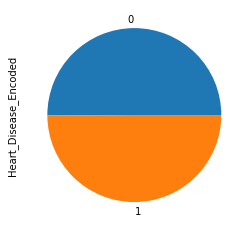

In [36]:
# visulizad the proportion, to see whether the class is balanced or not.
df_balanced_pandas = df_balanced.toPandas()
df_balanced_pandas['Heart_Disease_Encoded'].value_counts().plot.pie()

In [37]:
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.stat import ChiSquareTest

df_balanced_temp = df_balanced

# Indexing all the categorical variables
indexers = [
    StringIndexer(inputCol=c, outputCol=c+"_Indexed").fit(df_balanced_temp) for c in [
        'Diabetes', 'Sex', 'Age_Category', 'Health_Status', 'Alcohol_Consumption_Status', 'Fruit_Consumption_Status'
    ]
]

# Apply transformations
for indexer in indexers:
    df_balanced_temp = indexer.transform(df_balanced_temp)

# Assembling indexed features into one vector
assembler = VectorAssembler(
    inputCols=['Diabetes_Indexed', 'Sex_Indexed', 'Age_Category_Indexed', 'Health_Status_Indexed', 'Alcohol_Consumption_Status_Indexed', 'Fruit_Consumption_Status_Indexed'],
    outputCol="features"
)


assembled = assembler.transform(df_balanced_temp)

# Using ChiSquareTest
r = ChiSquareTest.test(assembled, 'features', 'Heart_Disease_Encoded').head()
print("pValues: " + str(r.pValues))

/home/ubuntu/spark-3.2.1-bin-hadoop2.7/python/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


pValues: [0.0,0.0,0.0,0.0,0.0,0.0]


In [38]:
num_rows = df_balanced.count()
num_cols = len(df_balanced.columns)

print("shape ({}, {})".format(num_rows, num_cols) )

shape (50000, 7)


In [39]:
df_balanced.printSchema()

root
 |-- Diabetes: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age_Category: string (nullable = true)
 |-- Health_Status: string (nullable = false)
 |-- Alcohol_Consumption_Status: string (nullable = false)
 |-- Fruit_Consumption_Status: string (nullable = false)
 |-- Heart_Disease_Encoded: integer (nullable = true)



In [40]:
# 7.2 Conduct data mining
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

data = assembled.select("features", "Heart_Disease_Encoded")

train_data, test_data = data.randomSplit([0.7,0.3])

log_reg_cvd = LogisticRegression(featuresCol='features',labelCol='Heart_Disease_Encoded')

pipeline = Pipeline(stages=[
  FCS_indexer, FCS_encoder,
  Sex_indexer, Sex_encoder,
  AC_indexer, AC_encoder,
  Diabetes_indexer, Diabetes_encoder,
  ACS_indexer, ACS_encoder,
  HS_indexer, HS_encoder,
  assembler,log_reg_cvd])

train_data, test_data = df_balanced.randomSplit([0.7,.3])
fit_model = pipeline.fit(train_data)
results = fit_model.transform(test_data)


In [41]:
results.show(5)

+--------+------+------------+-------------+--------------------------+------------------------+---------------------+--------------------------------+----------------------------+-----------+---------+--------------------+----------------+----------------+-------------+----------------------------------+------------------------------+---------------------+-----------------+--------------------+--------------------+--------------------+----------+
|Diabetes|   Sex|Age_Category|Health_Status|Alcohol_Consumption_Status|Fruit_Consumption_Status|Heart_Disease_Encoded|Fruit_Consumption_Status_Indexed|Fruit_Consumption_Status_Vec|Sex_Indexed|  Sex_Vec|Age_Category_Indexed|Age_Category_Vec|Diabetes_Indexed| Diabetes_Vec|Alcohol_Consumption_Status_Indexed|Alcohol_Consumption_Status_Vec|Health_Status_Indexed|Health_Status_Vec|            features|       rawPrediction|         probability|prediction|
+--------+------+------------+-------------+--------------------------+------------------------+

In [42]:
# 7.3 Search for pattern
evaluator = MulticlassClassificationEvaluator(labelCol="Heart_Disease_Encoded", predictionCol="prediction", metricName="accuracy")
train_results = fit_model.transform(train_data)
train_accuracy = evaluator.evaluate(train_results)
print("Train set accuracy: ", train_accuracy)
test_accuracy = evaluator.evaluate(results)
print("Test set accuracy: ", test_accuracy)

# 8.2 
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from sklearn.metrics import classification_report

# convert to Pandas DataFrame
y_true = results.select("Heart_Disease_Encoded").toPandas()
y_pred = results.select("prediction").toPandas()

# use classification_report from scikit-learn to generate report.
print(classification_report(y_true, y_pred))


Train set accuracy:  0.6959677649815678


Test set accuracy:  0.6970746984740455


              precision    recall  f1-score   support

           0       0.72      0.65      0.69      7605
           1       0.67      0.75      0.71      7402

    accuracy                           0.70     15007
   macro avg       0.70      0.70      0.70     15007
weighted avg       0.70      0.70      0.70     15007



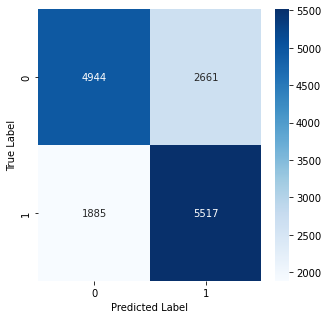

In [43]:
import pandas as pd

# Convert to Pandas DataFrame
pdf = results.select("Heart_Disease_Encoded", "prediction").toPandas()
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(pdf["Heart_Disease_Encoded"], pdf["prediction"])

# Plot the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Area under ROC curve: 0.7562659735689898


/home/ubuntu/spark-3.2.1-bin-hadoop2.7/python/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


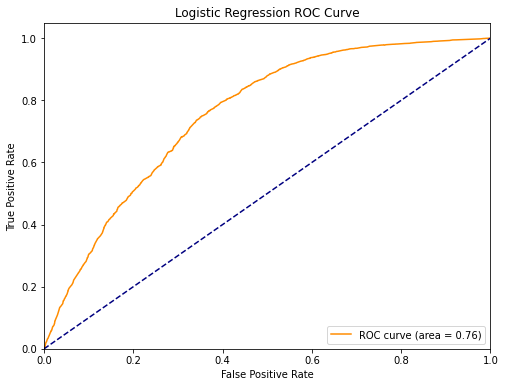

In [44]:
# 8.4 evaluate model 
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.mllib.evaluation import BinaryClassificationMetrics
import matplotlib.pyplot as plt

# Evaluate model
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="Heart_Disease_Encoded")
roc_auc = evaluator.evaluate(results, {evaluator.metricName: "areaUnderROC"})
print(f"Area under ROC curve: {roc_auc}")

# Get FPR and TPR
results_rdd = results.select(['probability', 'Heart_Disease_Encoded']) \
    .rdd.map(lambda row: (float(row['probability'][1]), float(row['Heart_Disease_Encoded'])))
metrics = BinaryClassificationMetrics(results_rdd)

fpr = dict()
tpr = dict()
roc_auc = dict()

y_test = results.select('Heart_Disease_Encoded').rdd.flatMap(lambda x: x).collect()
y_score = results.select('probability').rdd.map(lambda x: x['probability'][1]).collect()

from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# drow ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [45]:
from pyspark.ml.fpm import FPGrowth
from pyspark.sql.functions import array
from pyspark.sql import functions as F

df_as_list = df_balanced.withColumn("items", array(
  'Diabetes', 
  'Sex', 
  'Age_Category', 
  'Health_Status', 
  'Alcohol_Consumption_Status', 
  'Fruit_Consumption_Status', 
  'Heart_Disease_Encoded'
  ))

df_as_list = df_as_list.select("items")

fpGrowth = FPGrowth(itemsCol="items", minSupport=0.1, minConfidence=0.5)

model = fpGrowth.fit(df_as_list)

model.associationRules.show(5)

/home/ubuntu/spark-3.2.1-bin-hadoop2.7/python/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


+--------------------+--------------------+------------------+------------------+-------+
|          antecedent|          consequent|        confidence|              lift|support|
+--------------------+--------------------+------------------+------------------+-------+
|         [Obese, No]|              [Male]|0.5201953318986923|0.9648255284121454| 0.1257|
|         [Obese, No]|                 [0]|0.5555371627214037|1.1094766790250115|0.13424|
|         [Obese, No]|[Low Fruit Consum...|0.7751200132428406|1.0318424031454216| 0.1873|
|[Zero Alcohol Con...|                 [1]| 0.581062951496388|1.1638017775524514|0.22522|
|[Zero Alcohol Con...|              [Male]|0.5043343653250774|0.9354076068793631|0.19548|
+--------------------+--------------------+------------------+------------------+-------+
only showing top 5 rows



In [46]:
from pyspark.sql.functions import array, desc

filtered_rules_1 = model.associationRules.filter(F.expr("array_contains(consequent, '1')")).orderBy(desc("confidence")).limit(5)
filtered_rules_1.show()
filtered_rules_0 = model.associationRules.filter(F.expr("array_contains(consequent, '0')")).orderBy(desc("confidence")).limit(5)
filtered_rules_0.show()


+--------------------+----------+------------------+------------------+-------+
|          antecedent|consequent|        confidence|              lift|support|
+--------------------+----------+------------------+------------------+-------+
|         [Yes, Male]|       [1]|0.7842097287467799|1.5706812384769666| 0.1035|
|[Yes, Zero Alcoho...|       [1]|0.7679777512912197|1.5381704680564408|0.11598|
|[Yes, Low Fruit C...|       [1]|0.7527019174898315|  1.50757474260902|0.12954|
|               [Yes]|       [1]|0.7474116387004641|1.4969789270558886|0.16748|
|[Zero Alcohol Con...|       [1]|0.6317781870268058| 1.265378519121146| 0.1235|
+--------------------+----------+------------------+------------------+-------+

+--------------------+----------+------------------+------------------+-------+
|          antecedent|consequent|        confidence|              lift|support|
+--------------------+----------+------------------+------------------+-------+
|[Low Alcohol Cons...|       [0]| 0.644